In [3]:
%matplotlib inline
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

**Loading the Data**

Load the data using the Pandas `read_csv` function:

In [4]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [5]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


**Data Exploration**

Let's start off by exploring the files we just imported and understand what the data! Data Analysis is a very important step in any Machine Learning projects


*Getting a statistical summary of the data is also quite easy. *

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #instead of exponential, print the entire number
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


This looks alright? But wait! Checkout trip_duration column. Min is 1 second and Maximum is approximately `3526282.000/60*60= 980` hours! Possible?? Aww, I wish I had that time and money. So definetely there are outliers in the dataset. Lets clean in a bit.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


info() provides the type of data in the dataset. Now we know the data types. Cool!

**Check for NA or any outlier values**

In [9]:
print(train.isnull().sum())
#pretty cool!

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [10]:
# check for duplicate ids - nice, no duplicates
print('No of Duplicates, Trip IDs: {}'.format(len(train) - 
                                              len(train.drop_duplicates(subset='id'))))


No of Duplicates, Trip IDs: 0


In [11]:
# check latitude bounds, Latitude: -85 to +85
print('Latitude bounds: {} to {}'.format(
    max(train.pickup_latitude.min(), train.dropoff_latitude.min()),
    max(train.pickup_latitude.max(), train.dropoff_latitude.max())
))

Latitude bounds: 34.359695434570305 to 51.88108444213867


In [12]:
# check longitude bounds, Longitude: -180 to +180
print('Longitude bounds: {} to {}'.format(
    max(train.pickup_longitude.min(), train.dropoff_longitude.min()),
    max(train.pickup_longitude.max(), train.dropoff_longitude.max())
))


Longitude bounds: -121.9333038330078 to -61.33552932739258


In [13]:
# Get the vendor cnt
print('Vendors cnt: {}'.format(len(train.vendor_id.unique())))

Vendors cnt: 2


In [14]:
# datetime range - 6 months worth data
print('Datetime range: {} to {}'.format(train.pickup_datetime.min(), 
                                        train.dropoff_datetime.max()))


Datetime range: 2016-01-01 00:00:17 to 2016-07-01 23:02:03


In [15]:
# passenger count - 10, Hmm must be a big ride or big car! BTw, guess which car?
print('Passengers: {} to {}'.format(train.passenger_count.min(), 
                                        train.passenger_count.max()))

Passengers: 0 to 9


https://www.kaggle.com/frednavruzov/nyc-taxi-eda-feature-engineering
https://www.kaggle.com/karelrv/nyct-from-a-to-z-with-xgboost-tutorial
https://www.kaggle.com/poonaml/last-cab-to-new-york-animated-heatmap-trips-folium
https://www.kaggle.com/selfishgene/yellow-cabs-tell-the-story-of-new-york-city
https://www.kaggle.com/drgilermo/dynamics-of-new-york-city-animation
https://www.kaggle.com/maheshdadhich/strength-of-visualization-python-visuals-tutorial

**2.1 Data Cleaning**

***2.1.1 Trip Duration Clean-up***

As noted above, there are some outliers associated with the `trip_duration`, specifically a 980 hour maximum trip duration and a minimum of 1 second trip duration. Lets exclude which are outside standard deviation


In [16]:
m = np.mean(train['trip_duration'])
s = np.std(train['trip_duration'])
train = train[train['trip_duration'] <= m + 2*s]
train = train[train['trip_duration'] >= m - 2*s]

***2.1.2  Latitude and Longitude Clean-up ***

The borders of NY City comes out to be the below coordinates :

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85) 

Comparing this to our `train.describe()` output we see that there are some coordinate points (pick ups/drop offs) that fall outside these borders. So let's limit our area of investigation to within the NY City borders.



In [17]:
train = train[train['pickup_longitude'] <= -73.75]
train = train[train['pickup_longitude'] >= -74.03]
train = train[train['pickup_latitude'] <= 40.85]
train = train[train['pickup_latitude'] >= 40.63]
train = train[train['dropoff_longitude'] <= -73.75]
train = train[train['dropoff_longitude'] >= -74.03]
train = train[train['dropoff_latitude'] <= 40.85]
train = train[train['dropoff_latitude'] >= 40.63]

Lets convert `pickup_datetime` and `dropoff_datetime` to `datetime` which might be helpful in feature extraction (Maybe, I don't noe!) 

In [18]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)
train.loc[:, 'pickup_date'] = train['pickup_datetime'].dt.date
test.loc[:, 'pickup_date'] = test['pickup_datetime'].dt.date
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)


**3. Data Visualization**

I think this is my favorite part!

****a. Trip Duration ****



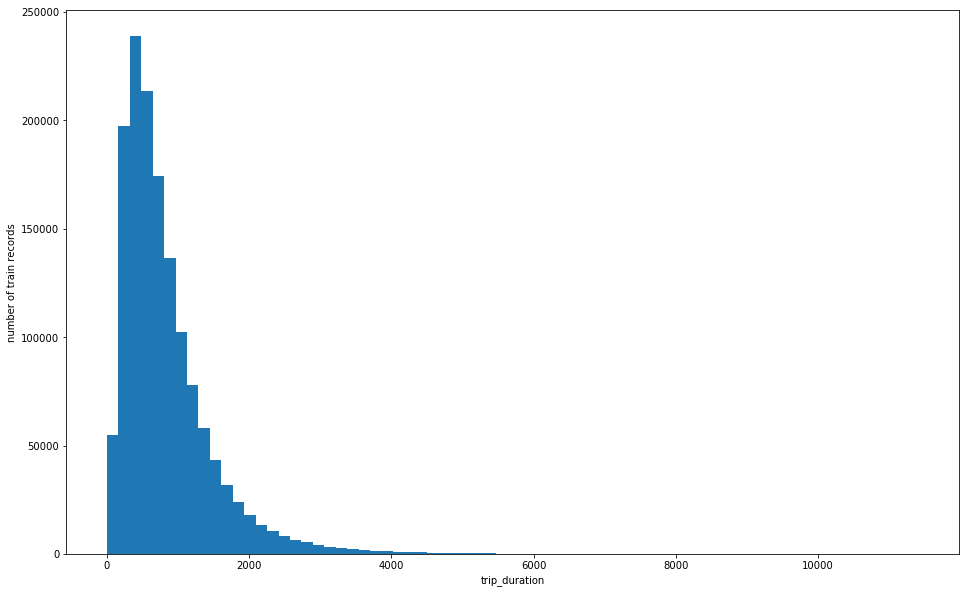

In [19]:
plt.hist(train['trip_duration'].values, bins=71)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

Pickups and Dropoff's of Newyork

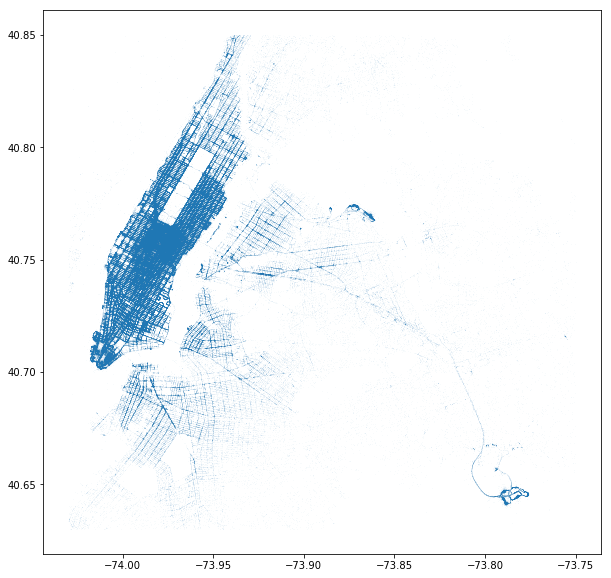

In [20]:
longitude = list(train.pickup_longitude) + list(train.dropoff_longitude)
latitude = list(train.pickup_latitude) + list(train.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)
plt.show()

In [21]:
dayNames = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthNames = ['January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December']

#month
train["monthPickUp"] = train.pickup_datetime.dt.month.astype(np.uint8)
train["monthDropOff"] = train.dropoff_datetime.dt.month.astype(np.uint8)

#day
train["dayPickUp"] = train.pickup_datetime.dt.weekday.astype(np.uint8)
train["dayDropOff"] = train.dropoff_datetime.dt.weekday.astype(np.uint8)

#hour
train["hourPickUp"] = train.pickup_datetime.dt.hour.astype(np.uint8)
train["hourDropOff"] = train.dropoff_datetime.dt.hour.astype(np.uint8)

#for test set
#month
test["monthPickUp"] = test.pickup_datetime.dt.month.astype(np.uint8)

#day
test["dayPickUp"] = test.pickup_datetime.dt.weekday.astype(np.uint8)

#hour
test["hourPickUp"] = test.pickup_datetime.dt.hour.astype(np.uint8)

In [22]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,monthPickUp,dayPickUp,hourPickUp
0,id3004672,1,2016-06-30 23:59:58,1,-73.988,40.732,-73.990,40.757,N,2016-06-30,6,3,23
1,id3505355,1,2016-06-30 23:59:53,1,-73.964,40.680,-73.960,40.655,N,2016-06-30,6,3,23
2,id1217141,1,2016-06-30 23:59:47,1,-73.997,40.738,-73.986,40.730,N,2016-06-30,6,3,23
3,id2150126,2,2016-06-30 23:59:41,1,-73.956,40.772,-73.986,40.730,N,2016-06-30,6,3,23
4,id1598245,1,2016-06-30 23:59:33,1,-73.970,40.761,-73.962,40.756,N,2016-06-30,6,3,23


Let me plot the distribution based on hour.

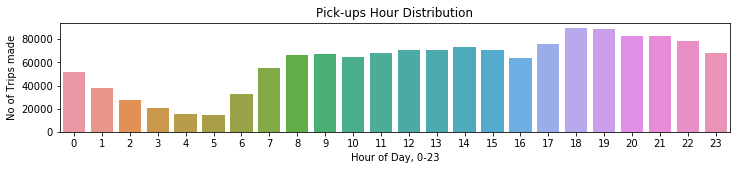

In [23]:
plt.figure(figsize=(12,2))
data = train.groupby("hourPickUp").aggregate({"id":"count"}).reset_index()
sns.barplot(x='hourPickUp', y='id', data=data)
plt.title('Pick-ups Hour Distribution')
plt.xlabel('Hour of Day, 0-23')
plt.ylabel('No of Trips made')

So from the above graph, we can infer maximum rides are requested in the evening. But being a California/Texas guy, New York seems to be busy city!

Now, distribution based on days of the week

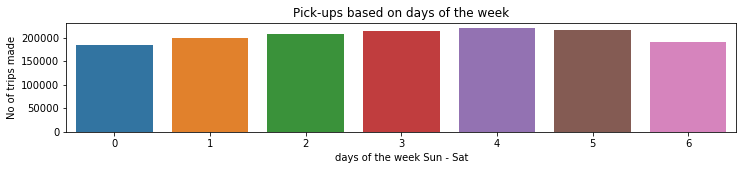

In [24]:
plt.figure(figsize=(12,2))
data = train.groupby("dayPickUp").aggregate({"id":"count"}).reset_index()
sns.barplot(x="dayPickUp", y="id", data = data)
plt.title('Pick-ups based on days of the week')
plt.xlabel("days of the week Sun - Sat")
plt.ylabel("No of trips made")

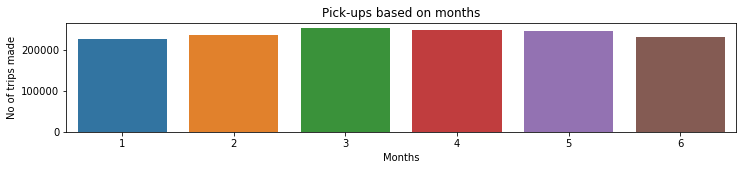

In [25]:
plt.figure(figsize=(12,2))
data = train.groupby("monthPickUp").aggregate({"id":"count"}).reset_index()
sns.barplot(x="monthPickUp", y="id", data = data)
plt.title('Pick-ups based on months')
plt.xlabel("Months")
plt.ylabel("No of trips made")

Heatmap for pickup for day vs time. 

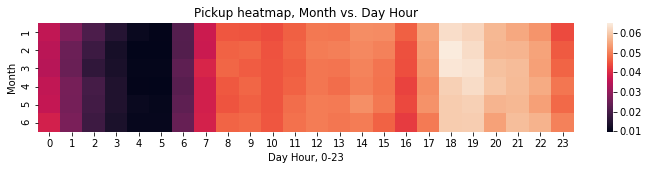

In [26]:
plt.figure(figsize=(12,2))
sns.heatmap(data = pd.crosstab(train.monthPickUp,
                              train.hourPickUp,
                              values=train.vendor_id, 
                              aggfunc='count',
                              normalize='index'))
plt.title('Pickup heatmap, Month vs. Day Hour')
plt.ylabel('Month') ; plt.xlabel('Day Hour, 0-23')


Can you infer from the above heatmap?

Similarly you can try Month vs Hour, Month vs day. (Assignment! Try it) haha

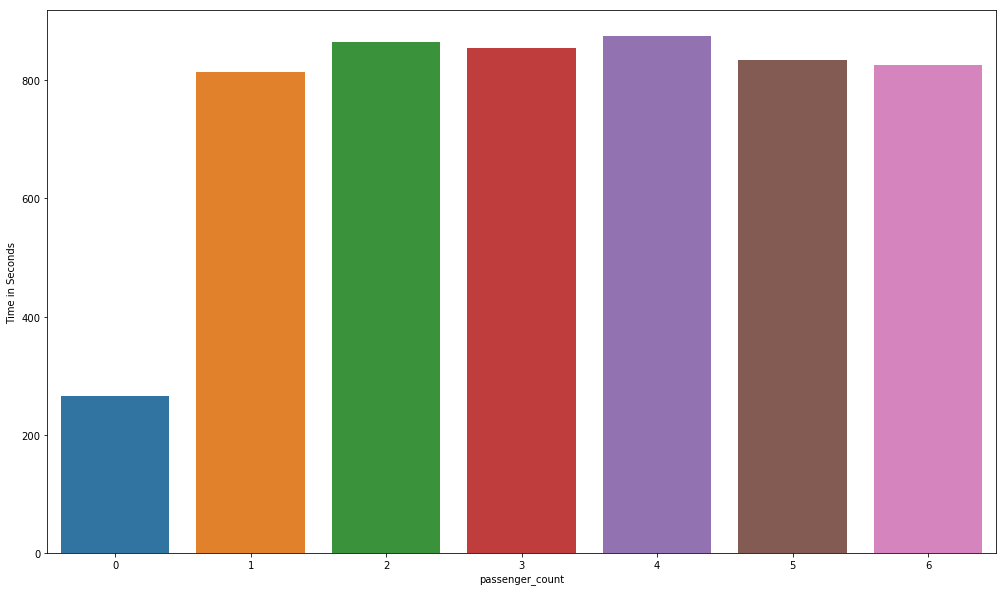

In [27]:
passengerCount = train.groupby('passenger_count')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylabel('Time in Seconds')
sns.barplot(passengerCount.index,passengerCount.values)

In [28]:
train.groupby('monthPickUp').size()

monthPickUp
1    226444
2    235054
3    252443
4    247855
5    244591
6    230741
dtype: int64

** Distance and Directionality **

Thanks to Beluga's post which can determine the distance and direction of a specific trip based on the pickup and dropoff coordinates. I didn't work on these functions! I gave credits to the author

In [29]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [30]:
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'distance_haversine'] = haversine_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)   

In [31]:
train.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

In [32]:
train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'direction'] = bearing_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

**KMeans to create Clusters**

Three steps to preparing the data: 
1. create the coordinates
2. configure the KMeans clustering parameters, and 
3. create the actual clusters:

In [33]:
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))


In [34]:
from sklearn.cluster import MiniBatchKMeans
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

In [35]:
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
test.loc[:, 'pickup_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'dropoff_cluster'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])

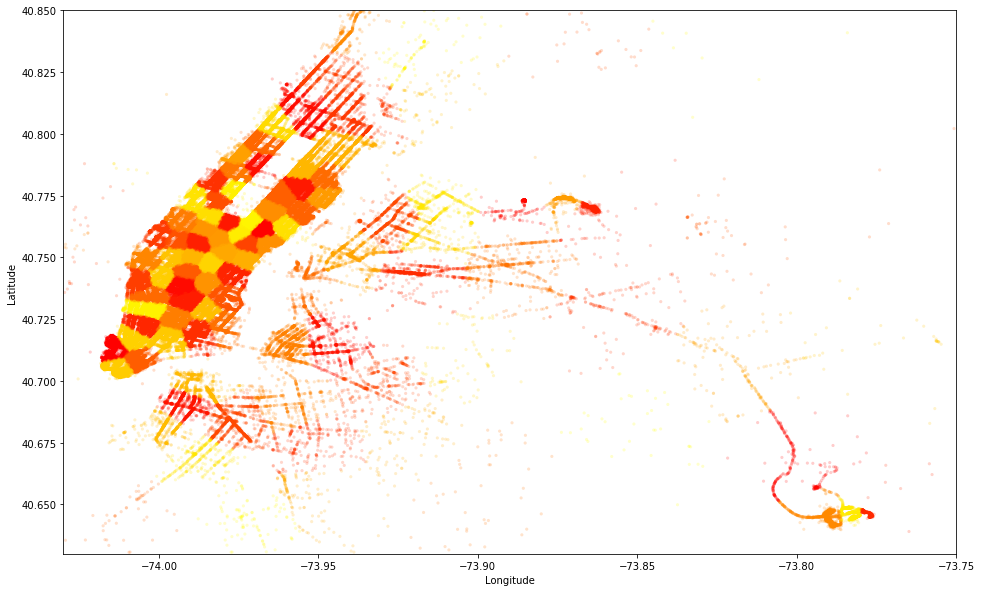

In [36]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:500000], train.pickup_latitude.values[:500000], s=10, lw=0,
           c=train.pickup_cluster[:500000].values, cmap='autumn', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

This shows a nice visual representation of the KMeans clustering algorithm at work (we used 100 clusters, but there is freedom to play around with this parameter to see how it changes the results). The clustering effectively created the different neighbourhoods in Manhattan as displayed by the borders between the different colors. This should be intuitive to some degree as a trip would differ from point A to point B, in various parts of New york. By nature, it's different.

**Creating Dummy Variables**

A simple function that changes categorical data into dummy/indicator variables. (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [37]:
vendor_train = pd.get_dummies(train['vendor_id'], prefix='vi', prefix_sep='_')
vendor_test = pd.get_dummies(test['vendor_id'], prefix='vi', prefix_sep='_')
passenger_count_train = pd.get_dummies(train['passenger_count'], prefix='pc', prefix_sep='_')
passenger_count_test = pd.get_dummies(test['passenger_count'], prefix='pc', prefix_sep='_')
store_and_fwd_flag_train = pd.get_dummies(train['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
store_and_fwd_flag_test = pd.get_dummies(test['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
cluster_pickup_train = pd.get_dummies(train['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_pickup_test = pd.get_dummies(test['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_dropoff_train = pd.get_dummies(train['dropoff_cluster'], prefix='d', prefix_sep='_')
cluster_dropoff_test = pd.get_dummies(test['dropoff_cluster'], prefix='d', prefix_sep='_')



In [38]:
month_train = pd.get_dummies(train['monthPickUp'], prefix='m', prefix_sep='_')
month_test = pd.get_dummies(test['monthPickUp'], prefix='m', prefix_sep='_')
dom_train = pd.get_dummies(train['dayPickUp'], prefix='dom', prefix_sep='_')
dom_test = pd.get_dummies(test['dayPickUp'], prefix='dom', prefix_sep='_')
hour_train = pd.get_dummies(train['hourPickUp'], prefix='h', prefix_sep='_')
hour_test = pd.get_dummies(test['hourPickUp'], prefix='h', prefix_sep='_')


In [39]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,monthDropOff,dayPickUp,dayDropOff,hourPickUp,hourDropOff,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,...,3,0,0,17,17,1.499,1.735,99.970,86,55
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,...,6,6,6,0,0,1.806,2.431,-117.154,33,94
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,...,1,1,1,11,12,6.385,8.204,-159.680,9,36
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,...,4,2,2,19,19,1.485,1.661,-172.738,81,79
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,...,3,5,5,13,13,1.189,1.199,179.474,62,47


Number of features is really less. :(    (Just 7)
I'm scared to run a Machine Learning model on this. Let me spend some time to get more meaningful data. Till then, I have documented steps on how to run XGBoost Algorithm and cross validation.

In [40]:
train.drop(['monthDropOff','dayDropOff','hourDropOff'],axis = 1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,monthPickUp,dayPickUp,hourPickUp,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,2016-03-14,3,0,17,1.499,1.735,99.970,86,55
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,2016-06-12,6,6,0,1.806,2.431,-117.154,33,94
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,2016-01-19,1,1,11,6.385,8.204,-159.680,9,36
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,2016-04-06,4,2,19,1.485,1.661,-172.738,81,79
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,2016-03-26,3,5,13,1.189,1.199,179.474,62,47
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.983,40.742,-73.992,40.749,N,443,2016-01-30,1,5,22,1.099,1.554,-44.996,57,70
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969,40.758,-73.957,40.766,N,341,2016-06-17,6,4,22,1.326,1.874,47.506,56,38
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969,40.798,-73.922,40.761,N,1551,2016-05-21,5,5,7,5.715,8.079,136.385,40,29
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999,40.738,-73.986,40.733,N,255,2016-05-27,5,4,23,1.310,1.775,118.284,80,74
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981,40.744,-73.973,40.790,N,1225,2016-03-10,3,3,21,5.121,5.754,7.604,14,62


In [41]:
train = train.drop(['id','vendor_id','passenger_count','store_and_fwd_flag','monthPickUp','monthDropOff','dayPickUp','dayDropOff','hourDropOff','hourPickUp',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis = 1)

In [42]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,monthPickUp,dayPickUp,hourPickUp,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster
0,id3004672,1,2016-06-30 23:59:58,1,-73.988,40.732,-73.990,40.757,N,2016-06-30,6,3,23,2.746,2.913,-3.595,11,12
1,id3505355,1,2016-06-30 23:59:53,1,-73.964,40.680,-73.960,40.655,N,2016-06-30,6,3,23,2.759,3.105,172.279,51,66
2,id1217141,1,2016-06-30 23:59:47,1,-73.997,40.738,-73.986,40.730,N,2016-06-30,6,3,23,1.306,1.846,133.326,4,74
3,id2150126,2,2016-06-30 23:59:41,1,-73.956,40.772,-73.986,40.730,N,2016-06-30,6,3,23,5.269,7.163,-150.957,38,74
4,id1598245,1,2016-06-30 23:59:33,1,-73.970,40.761,-73.962,40.756,N,2016-06-30,6,3,23,0.961,1.354,130.260,1,56


In [43]:
Test_id = test['id']
test = test.drop(['id','vendor_id','passenger_count','store_and_fwd_flag','monthPickUp','dayPickUp','hourPickUp',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis = 1)

In [44]:
train = train.drop(['dropoff_datetime','trip_duration'], axis = 1)

In [45]:
train.shape,test.shape

((1437128, 7), (625134, 7))

`Train, Test = train_test_split(train[0:100000], test_size = 0.2)`

`train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)`


`X_train = Train.drop(['log_trip_duration'], axis=1)`
`Y_train = Train["log_trip_duration"] `
`X_test = Test.drop(['log_trip_duration'], axis=1)`
`Y_test = Test["log_trip_duration"]`



`Y_test = Y_test.reset_index().drop('index',axis = 1)`
`Y_train = Y_train.reset_index().drop('index',axis = 1)`



`dtrain = xgb.DMatrix(X_train, label=Y_train)`
`dvalid = xgb.DMatrix(X_test, label=Y_test)`
`dtest = xgb.DMatrix(Test_master)`
`watchlist = [(dtrain, 'train'), (dvalid, 'valid')]`



`xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 'max_depth': 6,`
`'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,`
`'eval_metric': 'rmse', 'objective': 'reg:linear'}`
`model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2, maximize=False, verbose_eval=1)`
`print('Modeling RMSLE %.5f' % model.best_score)`